<h1 align=center> Seq2Seq (Encoder/Decoder) And Attention Mechanism In Depth</h1>

- Sequence-to-sequence (seq2seq) models are a type of neural network architecture used primarily for tasks where the input and output are sequences of data, which can vary in length. They have been widely used in various applications, including machine translation, text summarization, and speech recognition.

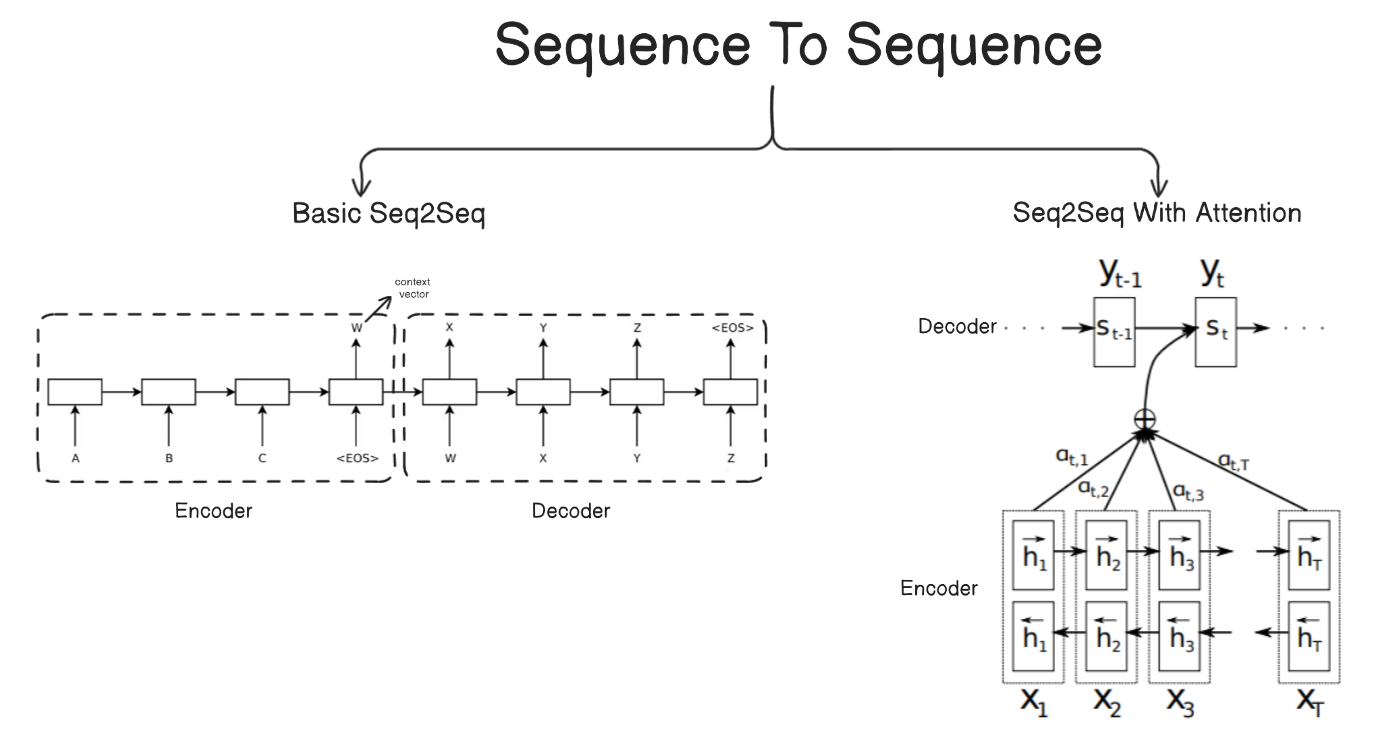

### Key Components

1. **Encoder**: The encoder processes the input sequence and compresses it into a fixed-size context vector (also called a thought vector). It typically consists of Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, or Gated Recurrent Units (GRUs).
2. **Decoder**: The decoder takes the context vector produced by the encoder and generates the output sequence. Like the encoder, it is usually an RNN, LSTM, or GRU.
3. **Attention Mechanism**: An enhancement to the basic seq2seq model, the attention mechanism allows the model to focus on different parts of the input sequence at each step of the output generation. This helps in handling longer sequences more effectively.

### Architecture

### Basic Seq2Seq Model

Research Paper: Sequence to Sequence Learning with Neural Networks

1. **Input Sequence**: A sequence of tokens (e.g., words in a sentence) is fed into the encoder.
2. **Encoder**: The encoder processes this sequence and outputs a context vector.
3. **Context Vector**: This vector captures the information from the entire input sequence.
4. **Decoder**: The context vector is fed into the decoder, which generates the output sequence token by token.
5. **Output Sequence**: The generated sequence is the model's final output.

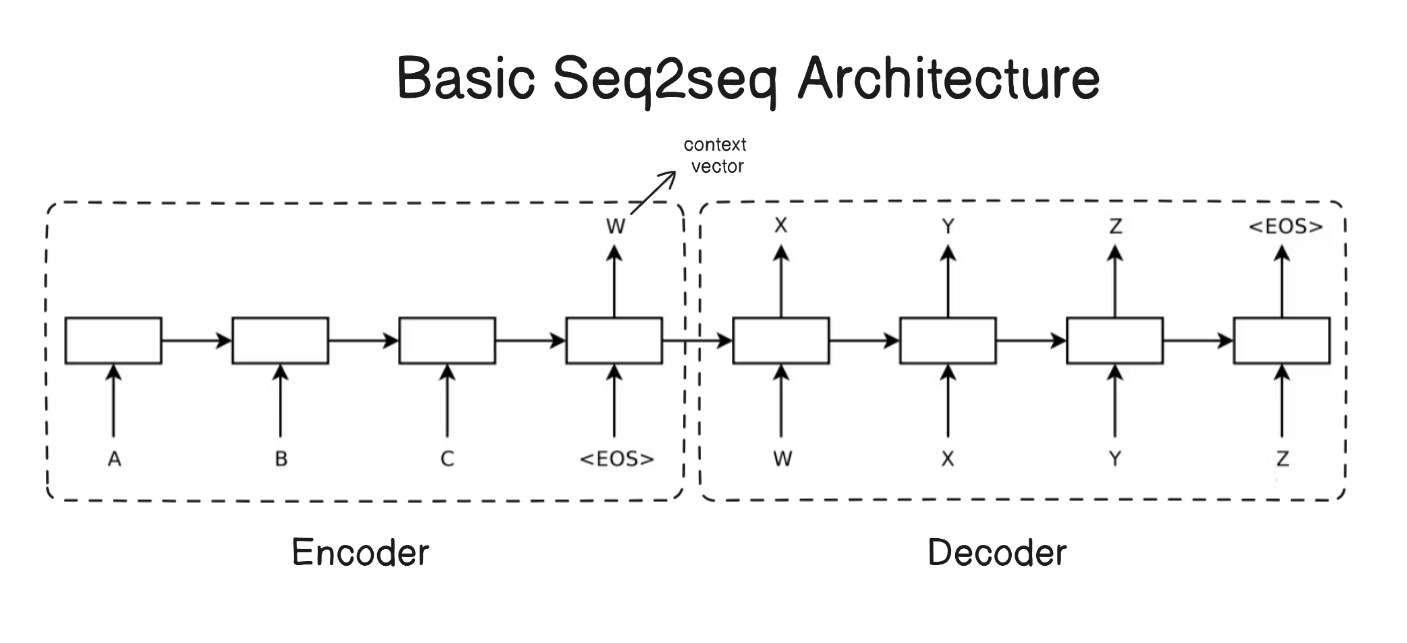

- Our model reads an input sentence “ABC” and produces “WXYZ” as the output sentence.
- The model stops making predictions after outputting the end-of-sentence token.
- Note that the LSTM reads the input sentence in reverse, because doing so introduces many short term dependencies in the data that make the optimization problem much easier.

**Model:**

$$
h_{<t>} = sigm(W_{hx}X + W_{hh} h_{<t-1>}) \\y_{<t>} = W_{yh}h_{<t>}
$$

- The goal of the LSTM is to estimate the conditional probability p(y1, . . . , yT′ |x1, . . . , xT ) where
(x1, . . . , xT ) is an input sequence and y1, . . . , yT′ is its corresponding output sequence whose length T′ may differ from T.
- The LSTM computes this conditional probability by first obtaining the fixed dimensional representation v of the input sequence (x1, . . . , xT ) given by the last hidden state of the
LSTM, and then computing the probability of y1, . . . , yT′ with a standard LSTM-LM formulation
whose initial hidden state is set to the representation v of x1, . . . , xT :

$$
p(y_1,...,yT'|x_1,...,xT) = \Pi_{i=1}^{T'}\; p(y_t|v,y_1,...,y_{t-1})
$$

- In this equation, each p(yt|v, y1, . . . , yt−1) distribution is represented with a softmax over all the
words in the vocabulary. We use the LSTM formulation from Graves.
- Note that we require that each sentence ends with a special end-of-sentence symbol “<EOS>”, which enables the model to define a distribution over sequences of all possible lengths. The overall scheme is outlined in above picture, where the shown LSTM computes the representation of “A”, “B”, “C”, “<EOS>” and then uses this representation to compute the probability of “W”, “X”, “Y”, “Z”, “<EOS>”.

**Research Paper Key Points About The Model:**

- Our actual models differ from the above description in three important ways. First, we used two
different LSTMs: one for the input sequence and another for the output sequence, because doing so increases the number model parameters at negligible computational cost and makes it natural to train the LSTM on multiple language pairs simultaneously.
- Second, we found that deep LSTMs significantly outperformed shallow LSTMs, so we chose an LSTM with four layers.
- Third, we found it extremely valuable to reverse the order of the words of the input sentence. So for example, instead of mapping the sentence a, b, c to the sentence α, β, γ, the LSTM is asked to map c, b, a to α, β, γ, where α, β, γ is the translation of a, b, c. This way, a is in close proximity to α, b is fairly close to β, and so on, a fact that makes it easy for SGD to “establish communication” between the input and the output. We found this simple data transformation to greatly boost the performance of the LSTM.

### Seq2Seq with Attention

Research Paper: NEURAL MACHINE TRANSLATION BY JOINTLY LEARNING TO ALIGN AND TRANSLATE

1. **Input Sequence**: Same as above.
2. **Encoder**: Processes the sequence and outputs a sequence of hidden states.
3. **Attention Layer**: At each decoding step, the attention mechanism computes a context vector as a weighted sum of the encoder's hidden states. The weights are determined based on the relevance of each hidden state to the current decoding step.
4. **Decoder**: Uses the context vector from the attention layer to generate each token of the output sequence.


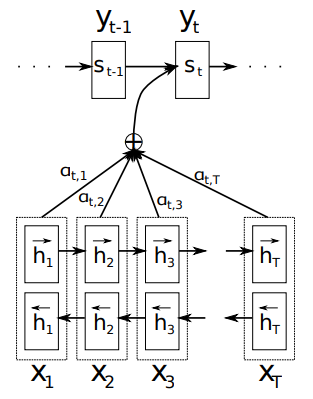
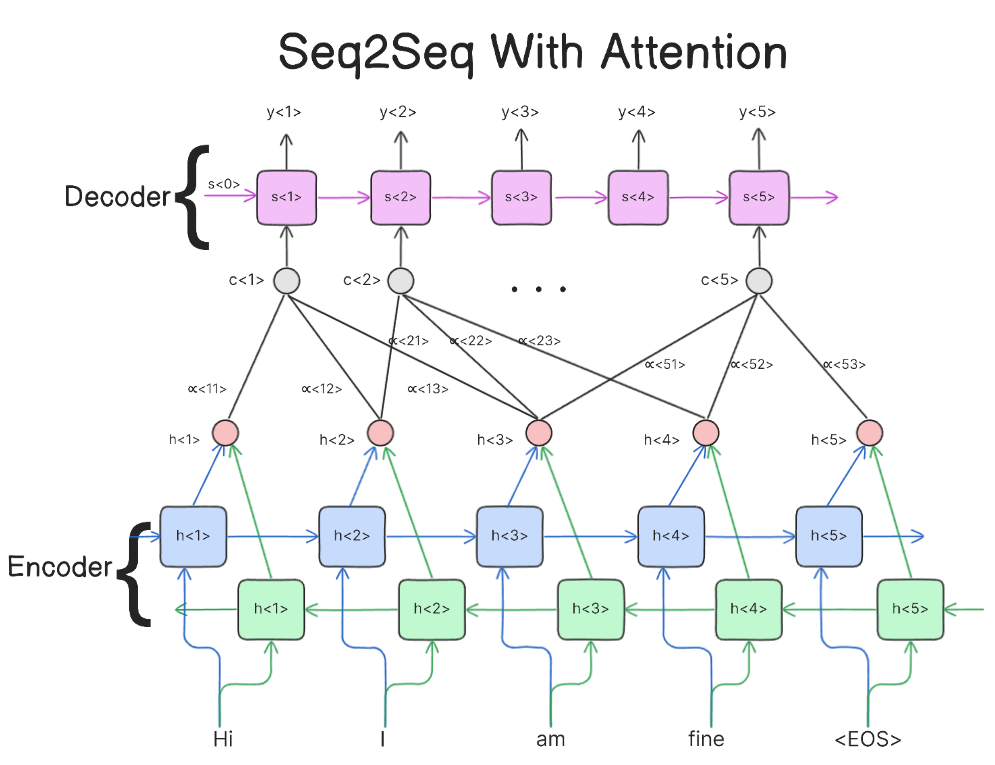

- The context vector c_i depends on a sequence of annotations (h_1, · · · , h_Tx) to which an encoder maps the input sentence. Each annotation h_i contains information about the whole input sequence with a strong focus on the parts surrounding the i-th word of the input sequence.
- In the above image, Tx=3
- The context vector c_i is, then, computed as a weighted sum of these annotations h_i:

$$
c_i = \sum_{j=1}^{T_x} \alpha_{ij}h_j
$$

- The weight αij of each annotation h_j is computed by:

$$
\alpha_{ij} = \frac{exp(e_{ij})}{\sum_{k=1}^{Tx} exp(e_{ik})},
$$

where:

$$
e_{ij} = a(s_{i-1}, h_j)
$$

is an alignment model which scores how well the inputs around position j and the output at position
i match. The score is based on the RNN hidden state s_i−1 and the j-th annotation h_j of the input sentence.
We parametrize the alignment model a as a feedforward neural network which is jointly trained with
all the other components of the proposed system.

### Applications

1. **Machine Translation**: Translating text from one language to another.
2. **Text Summarization**: Creating a concise summary of a longer text.
3. **Speech Recognition**: Converting spoken language into text.
4. **Chatbots and Conversational Agents**: Generating responses in a dialogue system.
5. **Image Captioning**: Generating descriptive text for a given image.

### Implementation Of seq2seq Model

- Seq2seq models are trained using supervised learning, where the training data consists of input-output sequence pairs. The objective is to minimize the difference between the generated output sequence and the target sequence.
- The most commonly used loss function is the categorical cross-entropy loss, calculated for each token in the output sequence.

Here's a simplified example using TensorFlow and Keras:

```python
pythonCopy code
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

# Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Seq2Seq Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# Fit the model
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)
```

### Challenges and Solutions

1. **Handling Long Sequences**: Long input sequences can be difficult for basic RNNs to manage. Attention mechanisms and more advanced architectures like Transformers address this issue.
2. **Data Sparsity**: For tasks like machine translation, a large amount of parallel text data is required.
3. **Training Time**: Seq2seq models can be computationally expensive to train.

### Advanced Models

1. **Transformer**: A more recent architecture that relies entirely on attention mechanisms and has significantly improved performance on many seq2seq tasks.
2. **BERT/GPT**: Pre-trained models that can be fine-tuned for specific seq2seq tasks.